In [105]:
ensbn = 20
mft = [5] # 10, 15, 20
bmk = [0, 1]
lt = 32

ensemble_all_layer = []

for m in mft:
    for l in [0,31]:
        for b in bmk:
            ensemble_all_layer.append(torch.load(f'../../cache/llama/ensemble/qkvout_ensbn{ensbn}_mft{m}_bmk{b}_lt{lt}_l{l}.pth', map_location=torch.device('cpu')))


In [106]:
import torch
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Function to plot a grid of heatmaps for attention maps
def plot_attention_maps(tensor, cmap='rainbow'):
    num_attention_maps = tensor.shape[0]
    grid_cols = math.ceil(math.sqrt(num_attention_maps))
    grid_rows = math.ceil(num_attention_maps / grid_cols)
    mask = (tensor == 32000)
    tensor = torch.where(mask, -1, tensor)
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(15, 10))
    for i, ax in enumerate(axes.flat):
        if i < tensor.shape[0]:
            sns.heatmap(tensor[i][-8:], ax=ax, cmap=cmap, cbar=True)
            ax.set_title(f'Attention Map {i+1} {tensor[i].shape}')
            ax.axis('off')  # Optional: Hide the axis ticks
        else:
            ax.axis('off')  # Hide unused plots
    plt.tight_layout()
    plt.show()


In [107]:
ensemble_all_layer[0], ensemble_all_layer[0]['indices'].shape

({'q': tensor([[[[ 2.8906e-01, -1.5703e+00,  2.2188e+00,  ..., -7.5781e-01,
              5.8203e-01, -8.6719e-01],
            [ 4.6094e-01, -8.1250e-01,  1.1797e+00,  ..., -7.2266e-01,
              5.6250e-01, -8.2031e-01],
            [ 7.8906e-01, -1.9531e+00,  2.0469e+00,  ..., -8.3984e-01,
              6.8750e-01, -1.0156e+00],
            ...,
            [ 5.2734e-01,  8.7109e-01,  1.2031e+00,  ..., -5.8203e-01,
              1.7480e-01, -8.4766e-01],
            [ 1.0938e-01,  1.3906e+00,  1.5781e+00,  ..., -1.0234e+00,
              8.0859e-01, -1.1406e+00],
            [-1.3672e-02,  1.8594e+00,  1.4062e+00,  ..., -1.0859e+00,
              7.8906e-01, -1.1797e+00]],
  
           [[ 5.0964e-03,  1.1475e-01, -4.5703e-01,  ...,  5.1172e-01,
             -9.6094e-01,  6.2109e-01],
            [ 4.9805e-01,  5.2979e-02, -1.5625e+00,  ..., -5.4688e-01,
              4.0820e-01, -5.3516e-01],
            [ 1.0449e-01,  4.8340e-02, -5.9766e-01,  ...,  2.2461e-01,
             -6

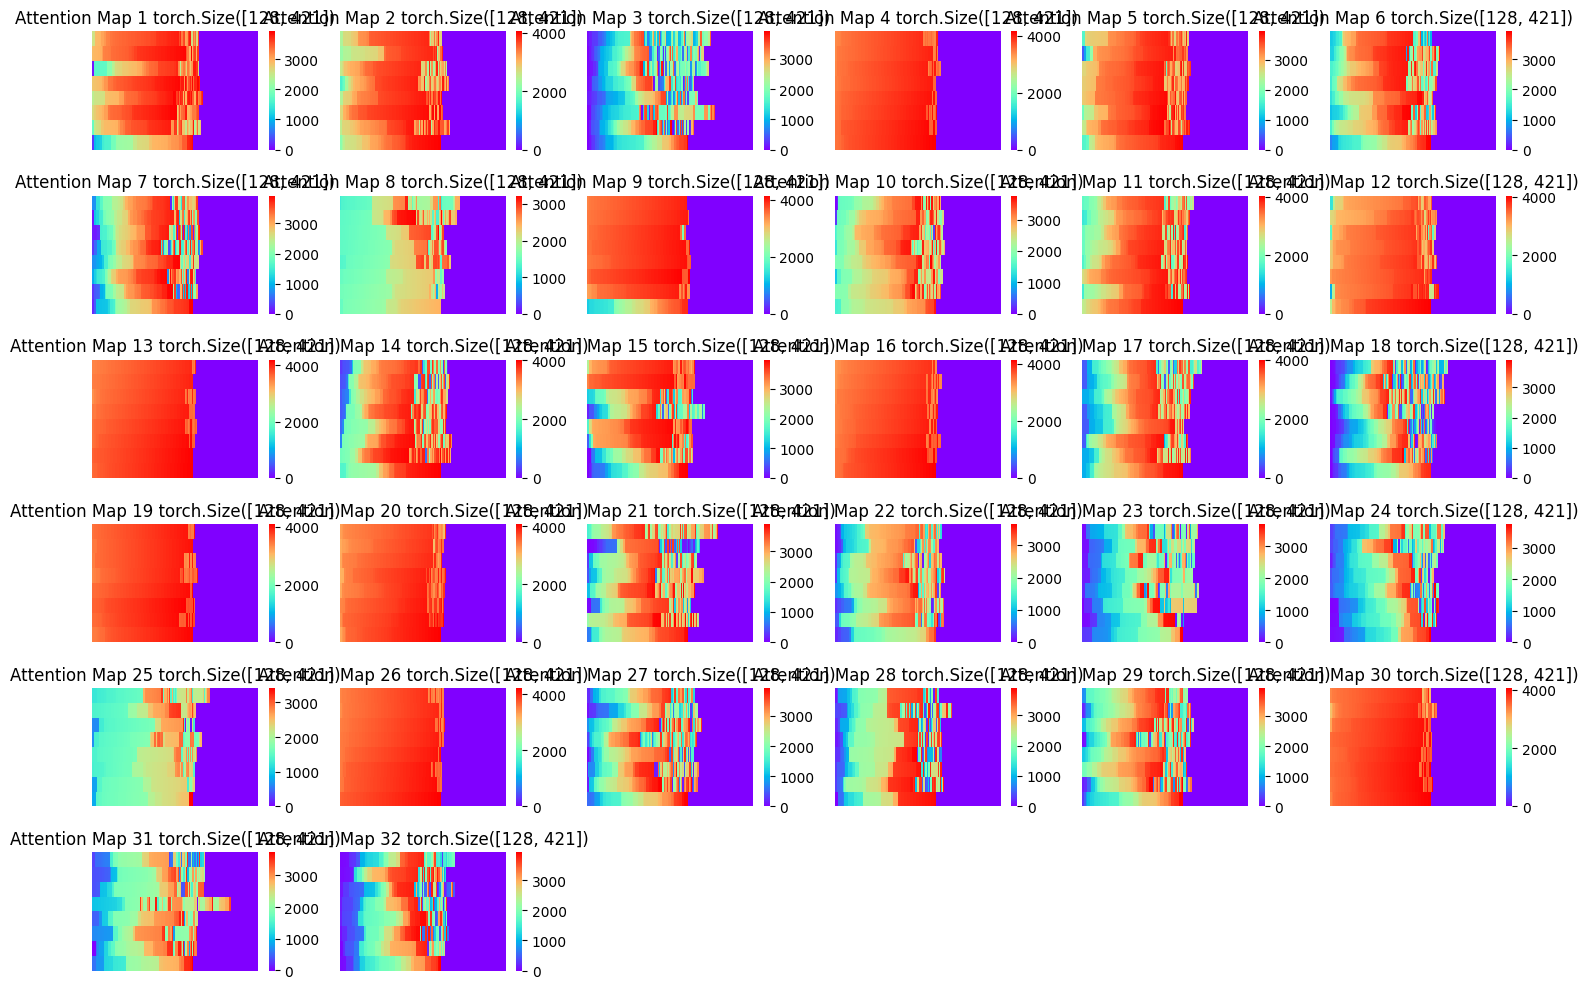

In [108]:
plot_attention_maps(ensemble_all_layer[0]['indices'][:,:], cmap='rainbow')  # Change cmap as needed

In [109]:
ensemble_all_layer[0]['indices']

tensor([[[0.0000e+00, 2.0000e+00, 4.0000e+00,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         [0.0000e+00, 2.0000e+00, 4.0000e+00,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         [0.0000e+00, 2.0000e+00, 4.0000e+00,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         ...,
         [2.6300e+03, 2.6320e+03, 2.6340e+03,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         [1.7660e+03, 1.7680e+03, 1.7700e+03,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         [2.7200e+02, 2.7400e+02, 2.7600e+02,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04]],

        [[0.0000e+00, 2.0000e+00, 4.0000e+00,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         [0.0000e+00, 2.0000e+00, 4.0000e+00,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         [0.0000e+00, 2.0000e+00, 4.0000e+00,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         ...,
         [2.7320e+03, 2.7340e+03, 2.7360e+03,  ..., 3.2000e+04,
          3.200

KeyboardInterrupt: 

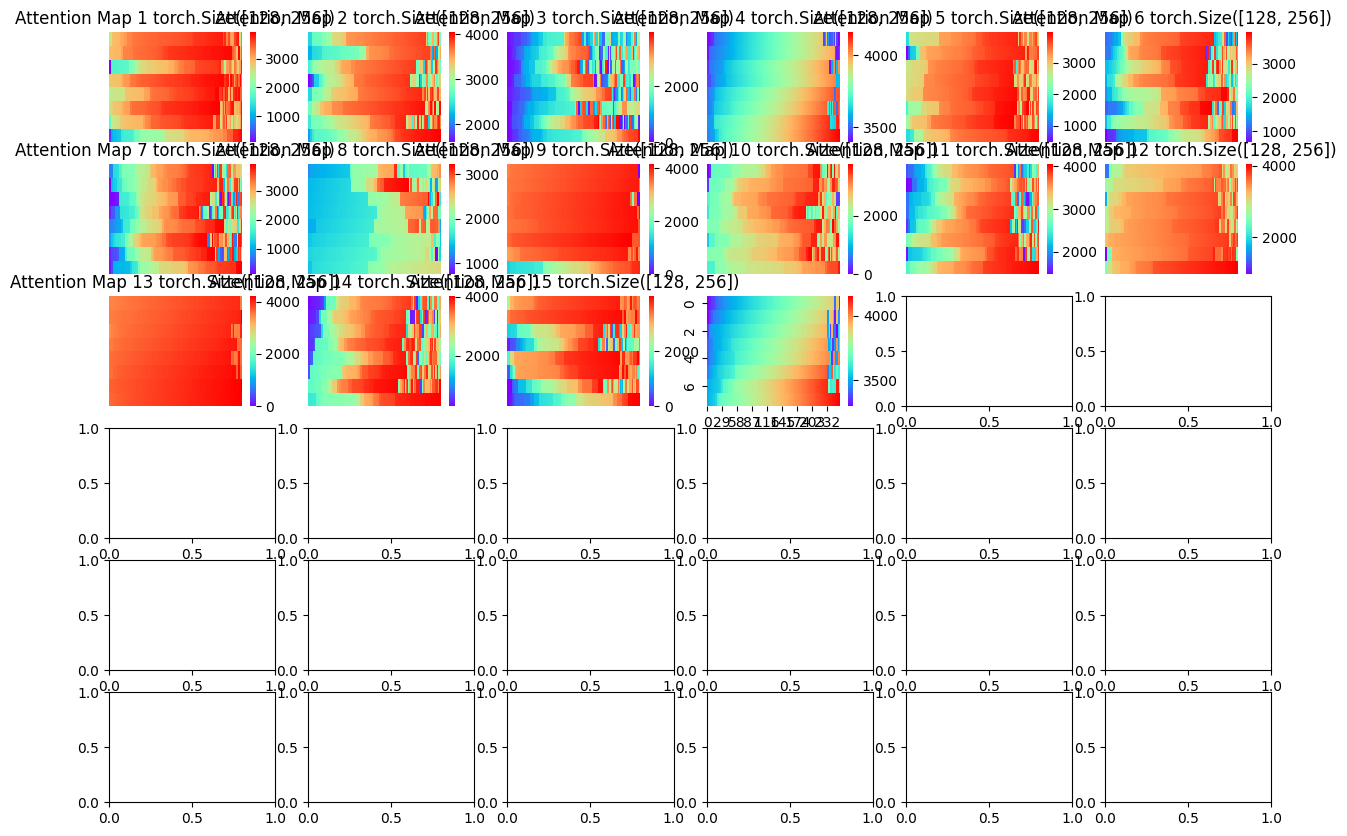

In [96]:
plot_attention_maps(ensemble_all_layer[0]['indices'][:,:,:256], cmap='rainbow')  # Change cmap as needed


In [ ]:
def k_length(ensemble_filtered):
    ## mask_i : where to discard leftovers 
    filtered_mask = ensemble_filtered == 32000
    # Determine which columns have all rows as -1
    columns_with_all_negative_one = torch.all(filtered_mask, dim=0)

    # Get the first index where all rows have -1
    nonzero_indices = torch.nonzero(columns_with_all_negative_one, as_tuple=True)

    # If there are any such columns, find the first one
    if len(nonzero_indices[0]) > 0:
        mask_k_i = nonzero_indices[0][0].item()
        # k_final = min(mask_k_i, ensemble_indices_k_size)
    else:
        mask_k_i = -1  # If no such index is found
        # k_final = ensemble_indices_k_size
    print(mask_k_i)

In [ ]:
k_length(ensemble_all_layer[0]['indices'])

0


In [ ]:
ensemble_filtered = ensemble_all_layer[0]['indices']

## mask_i : where to discard leftovers 
filtered_mask = ensemble_filtered == 32000
# Determine which columns have all rows as -1
columns_with_all_negative_one = torch.all(filtered_mask, dim=0)

# Get the first index where all rows have -1
nonzero_indices = torch.nonzero(columns_with_all_negative_one, as_tuple=True)

# If there are any such columns, find the first one
if len(nonzero_indices[0]) > 0:
    mask_k_i = nonzero_indices[0][0].item()
    # k_final = min(mask_k_i, ensemble_indices_k_size)
else:
    mask_k_i = -1  # If no such index is found
    # k_final = ensemble_indices_k_size

print(filtered_mask)

tensor([[[False, False, False,  ...,  True,  True,  True],
         [False, False, False,  ...,  True,  True,  True],
         [False, False, False,  ...,  True,  True,  True],
         ...,
         [False, False, False,  ...,  True,  True,  True],
         [False, False, False,  ...,  True,  True,  True],
         [False, False, False,  ...,  True,  True,  True]],

        [[False, False, False,  ...,  True,  True,  True],
         [False, False, False,  ...,  True,  True,  True],
         [False, False, False,  ...,  True,  True,  True],
         ...,
         [False, False, False,  ...,  True,  True,  True],
         [False, False, False,  ...,  True,  True,  True],
         [False, False, False,  ...,  True,  True,  True]],

        [[False, False, False,  ...,  True,  True,  True],
         [False, False, False,  ...,  True,  True,  True],
         [False, False, False,  ...,  True,  True,  True],
         ...,
         [False, False, False,  ...,  True,  True,  True],
         [

In [ ]:
ensemble_all_layer[1], ensemble_all_layer[1]['indices'].shape


({'q': tensor([[[[ 5.0781e-01, -1.2109e+00,  2.1250e+00,  ..., -9.3359e-01,
              8.0078e-01, -1.0859e+00],
            [ 5.8203e-01, -1.5625e+00,  2.0469e+00,  ..., -9.2578e-01,
              7.5391e-01, -1.0547e+00],
            [ 9.0234e-01, -1.6406e+00,  1.8828e+00,  ..., -8.3984e-01,
              6.6797e-01, -9.9219e-01],
            ...,
            [ 8.2812e-01,  1.5547e+00,  1.3438e+00,  ..., -6.4062e-01,
              2.2070e-01, -9.2188e-01],
            [ 3.6328e-01,  1.9375e+00,  1.5547e+00,  ..., -9.9219e-01,
              7.2656e-01, -1.1484e+00],
            [-7.2266e-02,  2.0156e+00,  1.4062e+00,  ..., -1.1016e+00,
              8.5938e-01, -1.2031e+00]],
  
           [[ 2.0605e-01, -8.8501e-03, -9.6094e-01,  ...,  8.3008e-02,
             -3.4570e-01,  1.2158e-01],
            [ 2.1289e-01,  5.5176e-02, -8.8281e-01,  ...,  2.7710e-02,
             -3.4961e-01,  8.1543e-02],
            [ 6.0059e-02,  2.0508e-02, -7.5781e-01,  ...,  2.1875e-01,
             -6

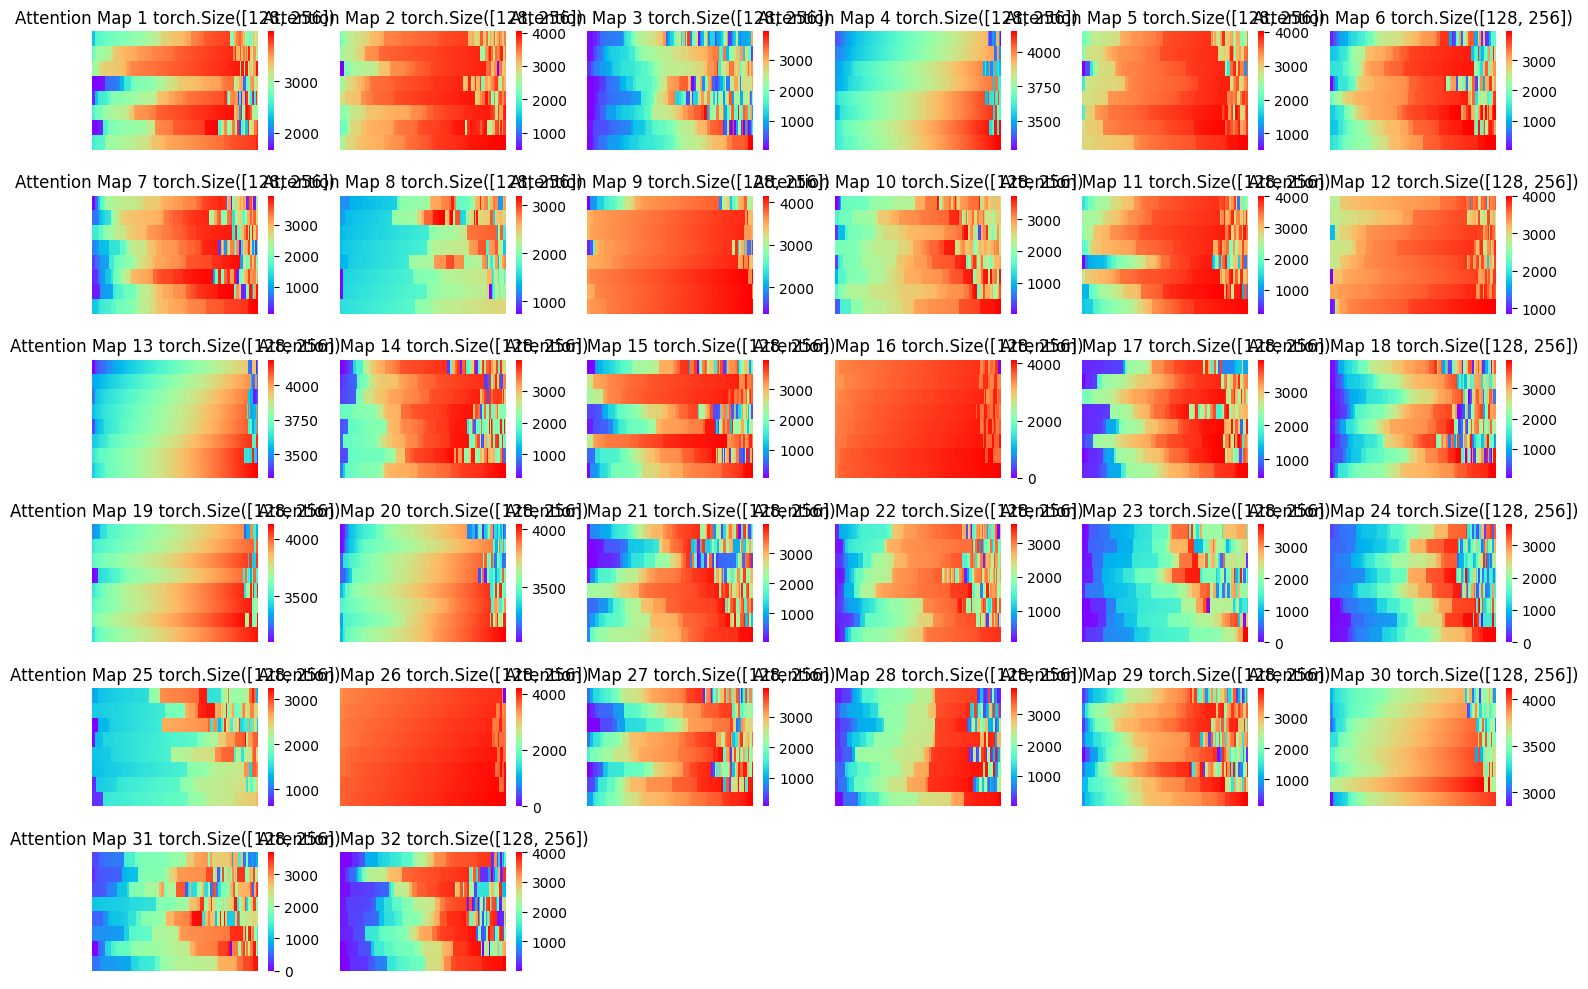

In [ ]:
plot_attention_maps(ensemble_all_layer[1]['indices'][:,:], cmap='rainbow')  # Change cmap as needed


In [ ]:
# ensemble_all_layer[2], ensemble_all_layer[2]['indices'].shape


({'q': tensor([[[[ 3.9453e-01, -5.0781e-01,  3.1641e-01,  ..., -1.1094e+00,
              7.3047e-01,  1.8848e-01],
            [-5.9766e-01, -6.4453e-01, -6.0156e-01,  ..., -1.6504e-01,
              9.2969e-01, -6.9531e-01],
            [-6.6406e-01, -4.1016e-01, -6.5234e-01,  ..., -7.0312e-01,
              1.6406e+00, -6.4941e-02],
            ...,
            [ 2.3242e-01, -3.0859e-01, -1.4297e+00,  ..., -4.9219e-01,
              1.0742e-01,  9.3359e-01],
            [ 7.3438e-01, -5.5859e-01, -2.4219e+00,  ...,  8.3594e-01,
              8.1250e-01,  3.8574e-02],
            [ 1.1719e-02, -3.1055e-01, -1.3281e+00,  ...,  6.9531e-01,
             -1.9043e-01, -6.3281e-01]],
  
           [[ 4.8750e+00, -7.4219e-01,  4.4922e-01,  ...,  1.9531e-01,
              4.6094e-01,  7.7734e-01],
            [ 6.2891e-01,  4.4922e-01, -5.0659e-03,  ...,  1.4141e+00,
              1.1562e+00, -8.8281e-01],
            [ 7.0703e-01,  7.3047e-01,  7.3828e-01,  ...,  4.0820e-01,
              1

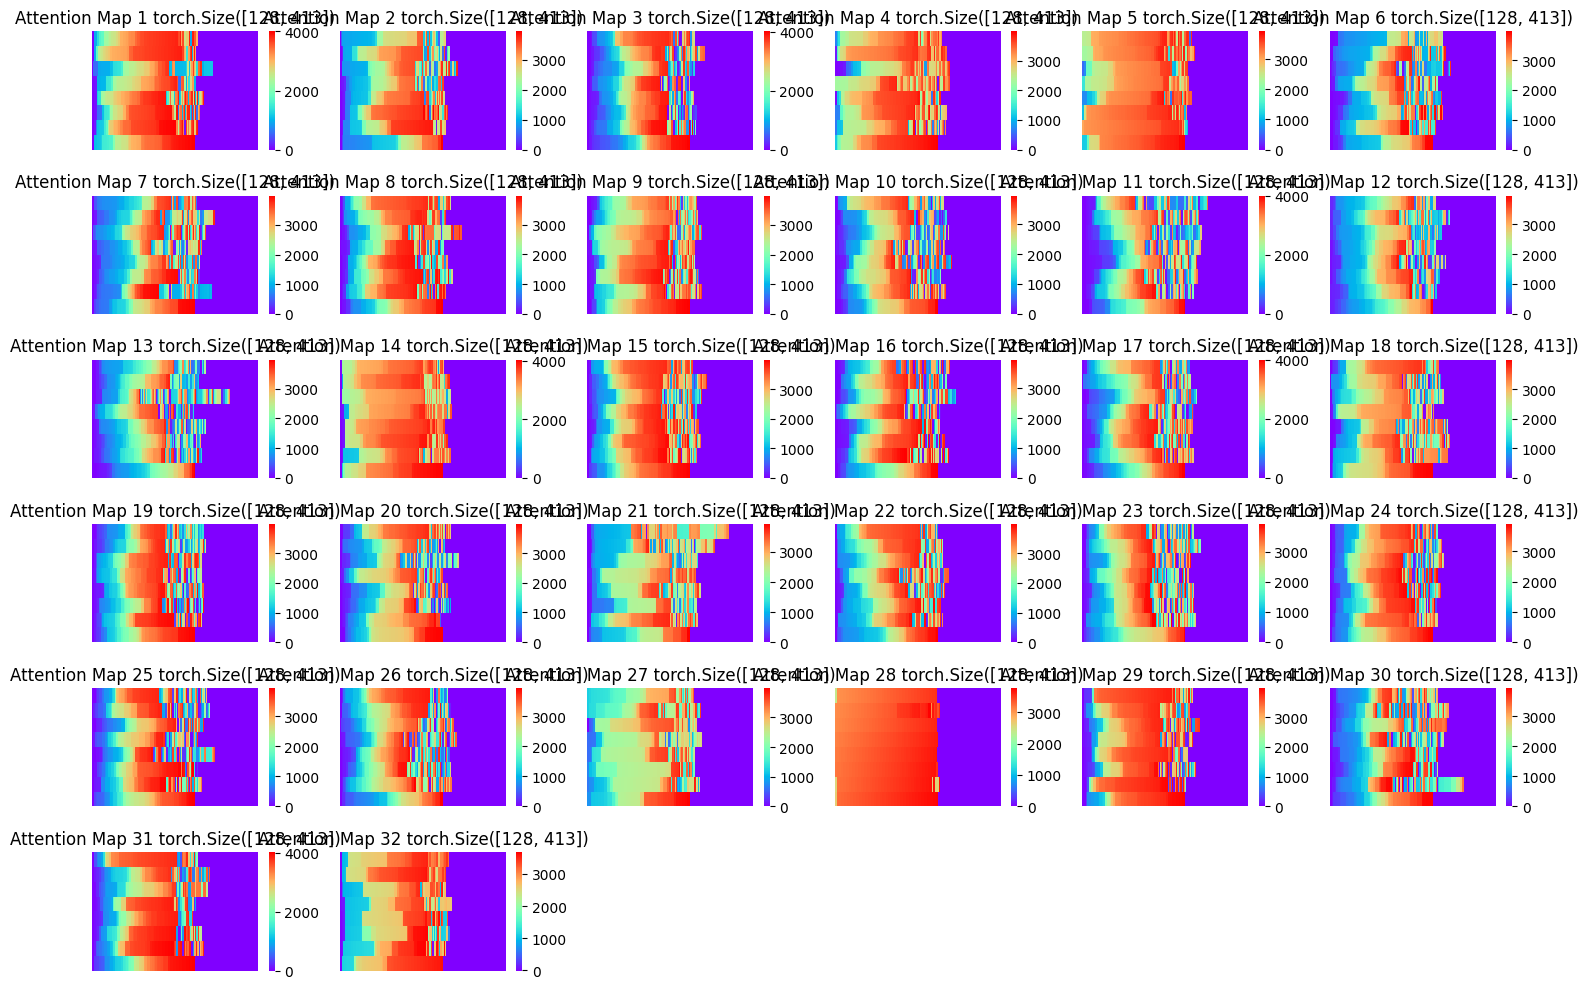

In [ ]:
# plot_attention_maps(ensemble_all_layer[2]['indices'][:,:], cmap='rainbow')  # Change cmap as needed


In [ ]:
# ensemble_all_layer[3], ensemble_all_layer[3]['indices'].shape
# 

({'q': tensor([[[[ 3.9453e-01, -5.0781e-01,  3.1641e-01,  ..., -1.1094e+00,
              7.3047e-01,  1.8848e-01],
            [-5.9766e-01, -6.4453e-01, -6.0156e-01,  ..., -1.6504e-01,
              9.2969e-01, -6.9531e-01],
            [-6.6406e-01, -4.1016e-01, -6.5234e-01,  ..., -7.0312e-01,
              1.6406e+00, -6.4941e-02],
            ...,
            [ 2.5977e-01, -3.3398e-01, -1.4062e+00,  ..., -5.1172e-01,
              1.0352e-01,  8.7891e-01],
            [ 7.7344e-01, -5.5469e-01, -2.3594e+00,  ...,  8.2031e-01,
              8.4375e-01,  3.2959e-02],
            [ 5.8594e-02, -2.9688e-01, -1.2891e+00,  ...,  6.6406e-01,
             -1.8262e-01, -6.2500e-01]],
  
           [[ 4.8750e+00, -7.4219e-01,  4.4922e-01,  ...,  1.9531e-01,
              4.6094e-01,  7.7734e-01],
            [ 6.2891e-01,  4.4922e-01, -5.0659e-03,  ...,  1.4141e+00,
              1.1562e+00, -8.8281e-01],
            [ 7.0703e-01,  7.3047e-01,  7.3828e-01,  ...,  4.0820e-01,
              1

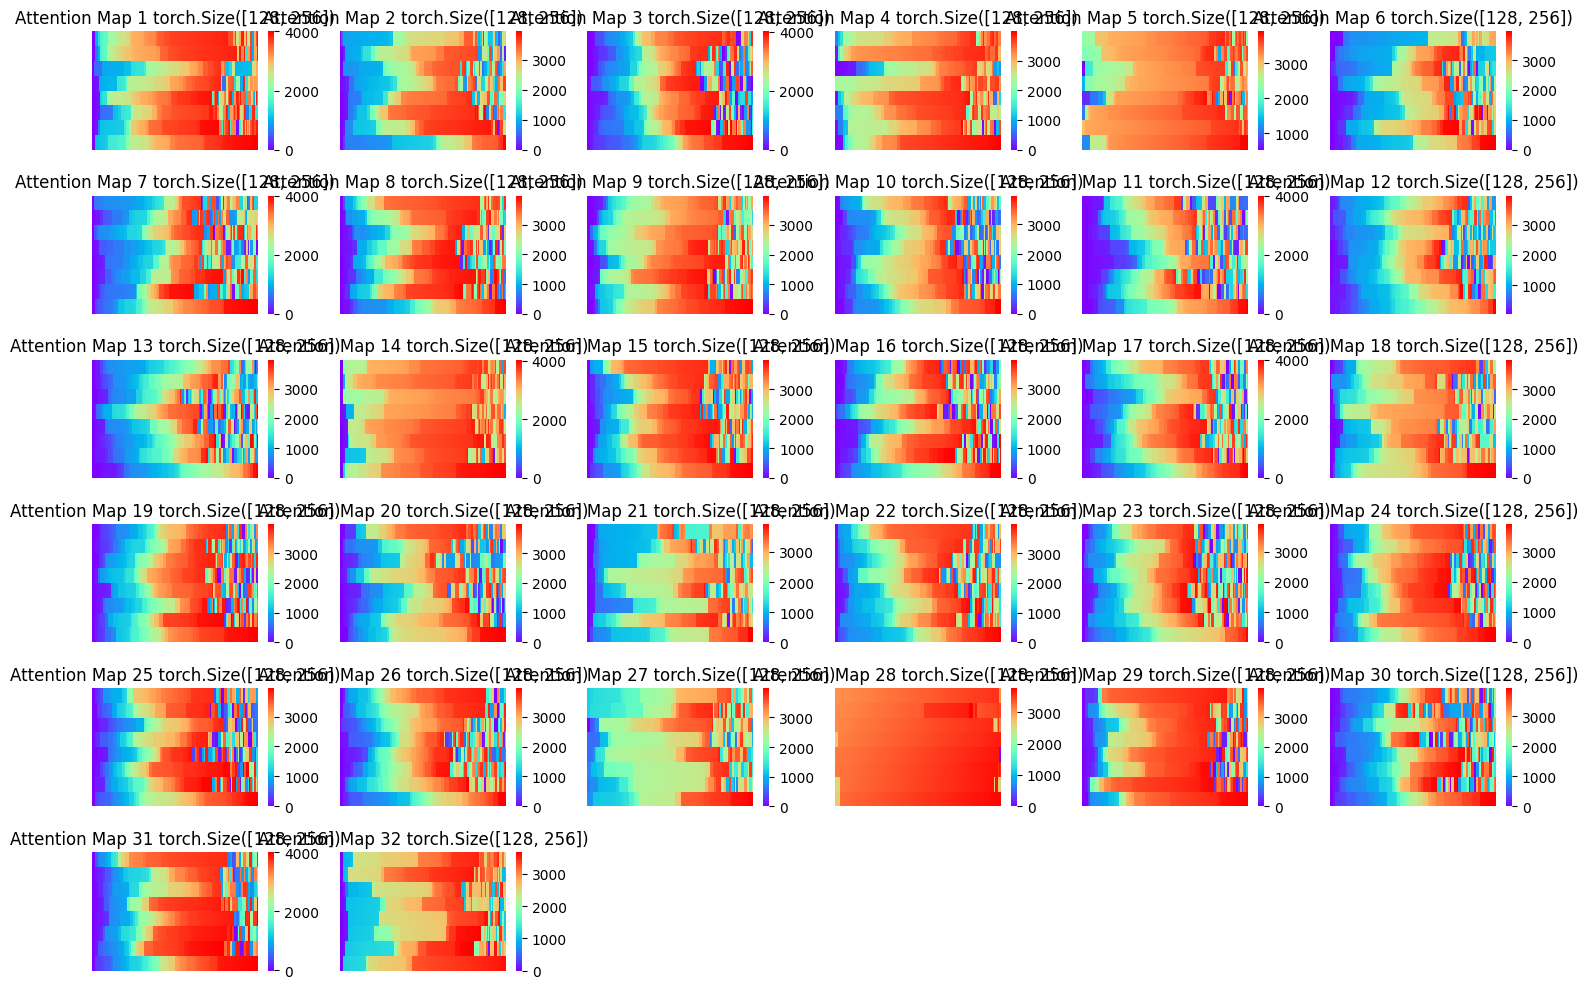

In [ ]:
# plot_attention_maps(ensemble_all_layer[3]['indices'][:,:], cmap='rainbow')  # Change cmap as needed
